In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/content/Retail_Apparel_Data_13.09.24_v1.csv')

In [3]:
df

,Invoice Number,Date Time,Customer ID,Product ID,Quantity,Price per Unit,Return Status,Sales Channel,Total Sales,Customer Age Group,Region,Product Category
0,10000,01/01/2021 10:20,74,3,2,24.00,Not Returned,In-Store,48.00,26-35,West,Footwear
1,10001,08/01/2021 03:10,92,10,6,40.24,Not Returned,In-Store,241.44,18-25,South,Footwear
2,1000,05/01/2021 20:24,86,20,5,25.96,Not Returned,Online,129.80,18-25,East,Clothing
3,10002,11/01/2021 03:43,57,11,6,85.86,Not Returned,Online,515.16,46-55,North,Clothing
4,10003,02/01/2021 07:26,73,25,5,72.88,Not Returned,In-Store,364.40,56+,West,Clothing
...,...,...,...,...,...,...,...,...,...,...,...,...
16893,9994,02/01/2021 10:36,53,24,1,40.80,Not Returned,In-Store,40.80,46-55,East,Accessories
16894,9995,09/01/2021 12:41,73,15,3,40.81,Not Returned,In-Store,122.43,56+,West,Footwear
16895,9997,05/01/2021 06:56,83,23,2,84.65,Not Returned,Online,169.30,56+,East,Clothing
16896,9998,02/01/2021 10:23,65,31,7,51.45,Returned,In-Store,360.15,26-35,West,Clothing


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16898 entries, 0 to 16897
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Invoice Number      16898 non-null  int64  
 1   Date Time           16898 non-null  object 
 2   Customer ID         16898 non-null  int64  
 3   Product ID          16898 non-null  int64  
 4   Quantity            16898 non-null  int64  
 5   Price per Unit      16898 non-null  float64
 6   Return Status       16898 non-null  object 
 7   Sales Channel       16898 non-null  object 
 8   Total Sales         16898 non-null  float64
 9   Customer Age Group  16552 non-null  object 
 10  Region              16898 non-null  object 
 11  Product Category    16898 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 1.5+ MB


In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.describe()

,Invoice Number,Customer ID,Product ID,Quantity,Price per Unit,Total Sales
count,16898.000000,16898.000000,16898.000000,16898.000000,16898.000000,16898.000000
mean,10473.348503,50.206001,25.463960,3.988164,60.099128,240.033409
std,5474.453895,28.896081,14.395134,2.049422,23.229113,159.466443
min,1000.000000,1.000000,1.000000,1.000000,20.000000,20.120000
25%,5726.250000,25.000000,13.000000,2.000000,40.050000,107.947500
50%,10461.000000,50.000000,25.000000,4.000000,59.870000,200.500000
75%,15211.750000,75.000000,38.000000,6.000000,80.607500,341.662500
max,19999.000000,100.000000,50.000000,60.000000,99.990000,699.930000


In [8]:
df.shape

(16898, 12)

In [7]:
#for the missing values
df.isnull().sum()

,0
Invoice Number,0
Date Time,0
Customer ID,0
Product ID,0
Quantity,0
Price per Unit,0
Return Status,0
Sales Channel,0
Total Sales,0
Customer Age Group,346


In [9]:
#to check relations of missing value category with 'Region' and 'Product Category'
import matplotlib.pyplot as plt
import seaborn as sns

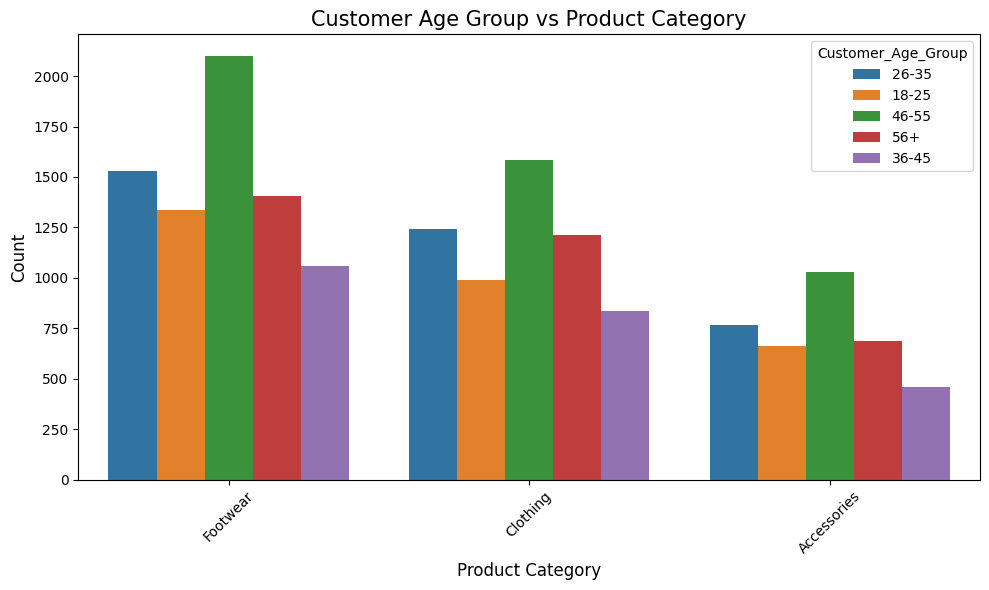

In [109]:
plt.figure(figsize=(10, 6))

sns.countplot(data=df, x='Product_Category', hue='Customer_Age_Group')

plt.title('Customer Age Group vs Product Category', fontsize=15)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

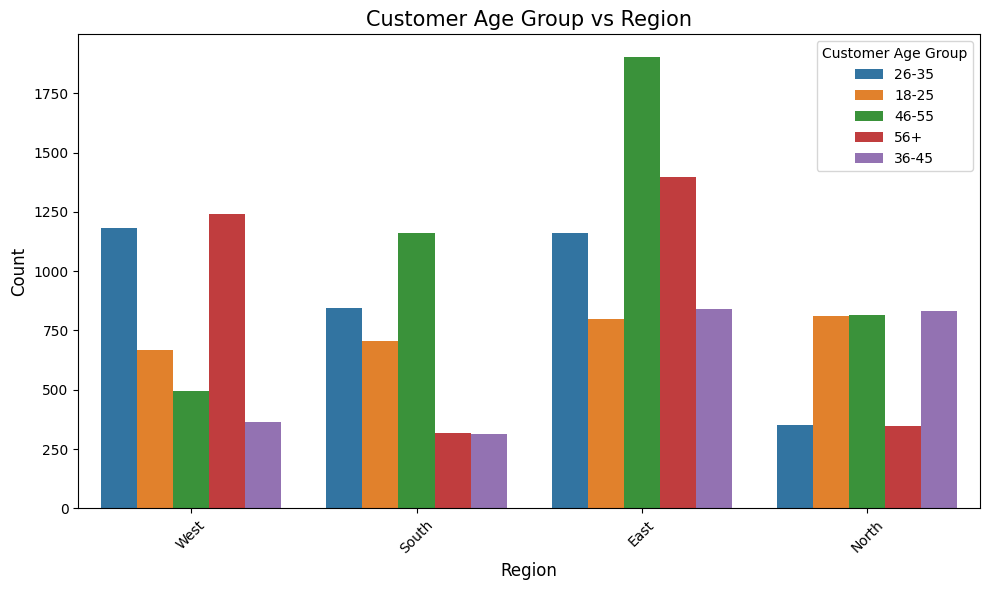

In [11]:
plt.figure(figsize=(10, 6))

sns.countplot(data=df, x='Region', hue='Customer_Age_Group')

plt.title('Customer Age Group vs Region', fontsize=15)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

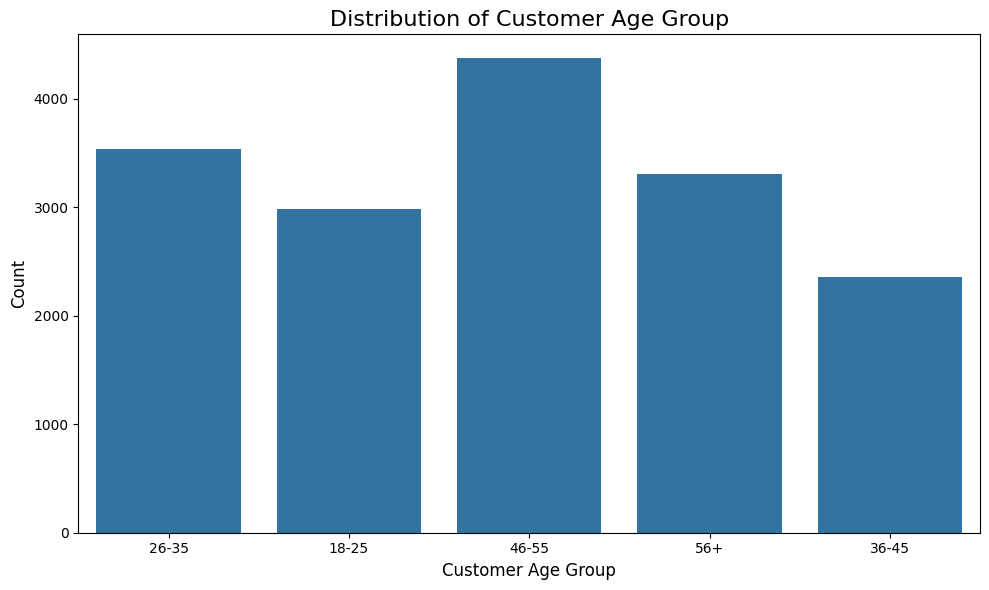

In [12]:
plt.figure(figsize=(10, 6))

sns.countplot(data=df, x='Customer Age Group')

plt.title('Distribution of Customer Age Group', fontsize=16)
plt.xlabel('Customer Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

In [14]:
#filling missing values of Customer Age Group with the most frequent value
df['Customer Age Group'].mode()[0]

'46-55'

In [15]:
df['Customer Age Group'].fillna(df['Customer Age Group'].mode()[0], inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16898 entries, 0 to 16897
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Invoice Number      16898 non-null  int64  
 1   Date Time           16898 non-null  object 
 2   Customer ID         16898 non-null  int64  
 3   Product ID          16898 non-null  int64  
 4   Quantity            16898 non-null  int64  
 5   Price per Unit      16898 non-null  float64
 6   Return Status       16898 non-null  object 
 7   Sales Channel       16898 non-null  object 
 8   Total Sales         16898 non-null  float64
 9   Customer Age Group  16898 non-null  object 
 10  Region              16898 non-null  object 
 11  Product Category    16898 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 1.5+ MB


In [17]:
df.isnull().sum().sum()

0

In [18]:
#for the duplicate values
df.duplicated().sum()

0

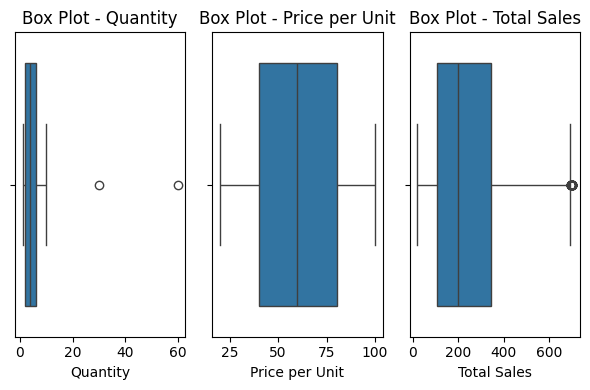

In [21]:
#for checking outliers
plt.figure(figsize=(6, 4))

plt.subplot(1, 3, 1)
sns.boxplot(x=df['Quantity'])
plt.title('Box Plot - Quantity')

plt.subplot(1, 3, 2)
sns.boxplot(x=df['Price per Unit'])
plt.title('Box Plot - Price per Unit')

plt.subplot(1, 3, 3)
sns.boxplot(x=df['Total Sales'])
plt.title('Box Plot - Total Sales')

plt.tight_layout()
plt.show()

In [28]:
#for fixing the outliers
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Quantity'] >= lower_bound) & (df['Quantity'] <= upper_bound)]

Text(0.5, 1.0, 'Box Plot - Quantity')

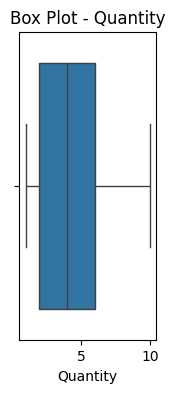

In [29]:
plt.figure(figsize=(6, 4))

plt.subplot(1, 3, 1)
sns.boxplot(x=df['Quantity'])
plt.title('Box Plot - Quantity')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16896 entries, 0 to 16897
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Invoice Number      16896 non-null  int64  
 1   Date Time           16896 non-null  object 
 2   Customer ID         16896 non-null  int64  
 3   Product ID          16896 non-null  int64  
 4   Quantity            16896 non-null  int64  
 5   Price per Unit      16896 non-null  float64
 6   Return Status       16896 non-null  object 
 7   Sales Channel       16896 non-null  object 
 8   Total Sales         16896 non-null  float64
 9   Customer Age Group  16896 non-null  object 
 10  Region              16896 non-null  object 
 11  Product Category    16896 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 1.7+ MB


In [34]:
df.columns

Index(['Invoice Number', 'Date Time', 'Customer ID', 'Product ID', 'Quantity',
       'Price per Unit', 'Return Status', 'Sales Channel', 'Total Sales',
       'Customer Age Group', 'Region', 'Product Category'],
      dtype='object')

In [35]:
#replacing spaces of column names
df.columns.str.replace(' ', '_')

Index(['Invoice_Number', 'Date_Time', 'Customer_ID', 'Product_ID', 'Quantity',
       'Price_per_Unit', 'Return_Status', 'Sales_Channel', 'Total_Sales',
       'Customer_Age_Group', 'Region', 'Product_Category'],
      dtype='object')

In [36]:
df.columns = df.columns.str.replace(' ', '_')

In [37]:
df.columns

Index(['Invoice_Number', 'Date_Time', 'Customer_ID', 'Product_ID', 'Quantity',
       'Price_per_Unit', 'Return_Status', 'Sales_Channel', 'Total_Sales',
       'Customer_Age_Group', 'Region', 'Product_Category'],
      dtype='object')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16896 entries, 0 to 16897
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Invoice_Number      16896 non-null  int64  
 1   Date_Time           16896 non-null  object 
 2   Customer_ID         16896 non-null  int64  
 3   Product_ID          16896 non-null  int64  
 4   Quantity            16896 non-null  int64  
 5   Price_per_Unit      16896 non-null  float64
 6   Return_Status       16896 non-null  object 
 7   Sales_Channel       16896 non-null  object 
 8   Total_Sales         16896 non-null  float64
 9   Customer_Age_Group  16896 non-null  object 
 10  Region              16896 non-null  object 
 11  Product_Category    16896 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.2+ MB


In [73]:
#insightful analysis and KPI calculation

In [82]:
total_revenue = df['Total_Sales'].sum()
print(f"Total Revenue: {total_revenue}")

avg_order_value = df['Total_Sales'].sum() / df['Invoice_Number'].nunique()
print(f"Average Order Value: {avg_order_value}")

total_units_sold = df['Quantity'].sum()
print(f"Total Units Sold: {total_units_sold}")

Total Revenue: 4055441.0400000005
Average Order Value: 241.15127787358034
Total Units Sold: 67302


Region
East     1448930.27
North     799790.10
South     804407.40
West     1002313.27
Name: Total_Sales, dtype: float64


<Axes: title={'center': 'Sales by Region'}, xlabel='Region'>

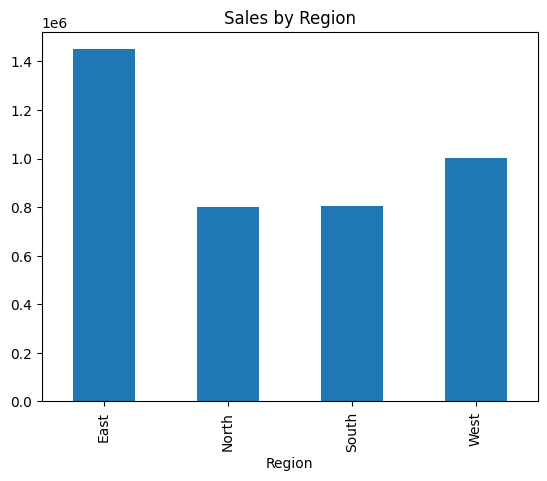

In [83]:
sales_by_region = df.groupby('Region')['Total_Sales'].sum()
print(sales_by_region)

sales_by_region.plot(kind='bar', title="Sales by Region")

Product_Category
Accessories     873716.25
Clothing       1400401.97
Footwear       1781322.82
Name: Total_Sales, dtype: float64


<Axes: title={'center': 'Sales by Product Category'}, xlabel='Product_Category'>

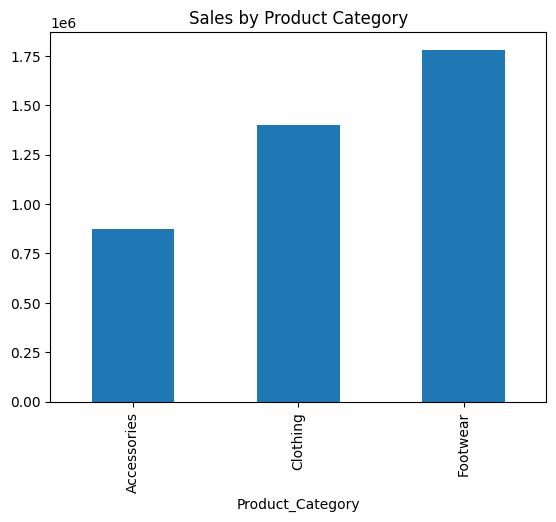

In [110]:
sales_by_category = df.groupby('Product_Category')['Total_Sales'].sum()
print(sales_by_category)
sales_by_category.plot(kind='bar', title="Sales by Product Category")

Customer_Age_Group
18-25     723605.69
26-35     844540.72
36-45     563122.49
46-55    1120054.72
56+       804117.42
Name: Total_Sales, dtype: float64


<Axes: title={'center': 'Sales by Age Group'}, xlabel='Customer_Age_Group'>

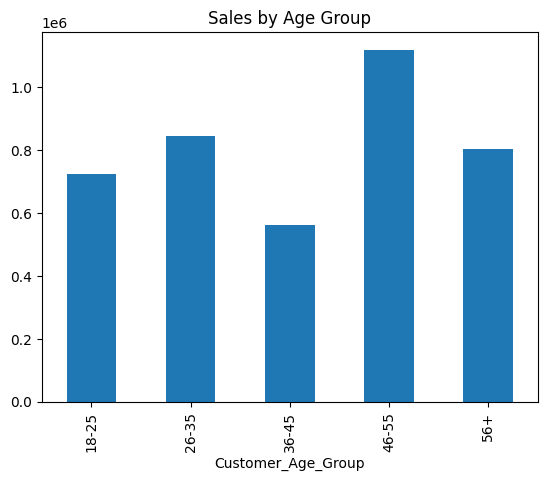

In [86]:
sales_by_age_group = df.groupby('Customer_Age_Group')['Total_Sales'].sum()
print(sales_by_age_group)
sales_by_age_group.plot(kind='bar', title="Sales by Age Group")

In [87]:
sales_by_channel = df.groupby('Sales_Channel')['Total_Sales'].sum()
print(sales_by_channel)

Sales_Channel
In Store      53420.63
In-Store    1550053.56
On line      182269.21
Online      2269697.64
Name: Total_Sales, dtype: float64


In [88]:
df['Sales_Channel'].unique()

array(['In-Store', 'Online', 'On line', 'In Store'], dtype=object)

In [89]:
#cleaning up the Sales_Channel column values into correct unique values
df['Sales_Channel'] = df['Sales_Channel'].replace({
    'In Store': 'In-Store',
    'On line': 'Online'
})

In [90]:
df['Sales_Channel'].unique()

array(['In-Store', 'Online'], dtype=object)

In [91]:
sales_by_channel = df.groupby('Sales_Channel')['Total_Sales'].sum()
print(sales_by_channel)

Sales_Channel
In-Store    1603474.19
Online      2451966.85
Name: Total_Sales, dtype: float64


In [92]:
#return rate
total_returns = df[df['Return_Status'] == 'Returned'].shape[0]
total_transactions = df.shape[0]
return_rate = (total_returns / total_transactions) * 100
print(f"Return Rate: {return_rate:.2f}%")

Return Rate: 1.08%


In [94]:
#the best performing products
top_products = df.groupby('Product_ID')['Total_Sales'].sum().sort_values(ascending=False).head(10)
print("Top Performing Products by Sales:")
print(top_products)

Top Performing Products by Sales:
Product_ID
40    93071.89
22    93056.90
3     92487.59
21    90995.58
49    88388.18
38    87479.46
9     87450.04
5     87449.90
19    86981.47
2     86885.10
Name: Total_Sales, dtype: float64


In [97]:
#customer lifetime values (CLTV)
cltv = df.groupby('Customer_ID')['Total_Sales'].sum()
print(cltv)

Customer_ID
1      39980.91
2      40148.15
3      39521.25
4      51892.18
5      48838.04
         ...   
96     37215.18
97     41629.15
98     40687.83
99     38840.60
100    48358.92
Name: Total_Sales, Length: 100, dtype: float64


In [99]:
df['Product_Category'].unique()

array(['Footwear', 'Clothing', 'Accessories', 'Foot wear', 'Acessories'],
      dtype=object)

In [100]:
#cleaning up the Product_Category column values into correct unique values
df['Product_Category'] = df['Product_Category'].replace({
    'Foot wear': 'Footwear',
    'Acessories': 'Accessories'
})

In [101]:
df['Product_Category'].unique()

array(['Footwear', 'Clothing', 'Accessories'], dtype=object)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16896 entries, 0 to 16897
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Invoice_Number      16896 non-null  int64         
 1   Data_Time           16896 non-null  datetime64[ns]
 2   Customer_ID         16896 non-null  int64         
 3   Product_ID          16896 non-null  int64         
 4   Quantity            16896 non-null  int64         
 5   Price_per_Unit      16896 non-null  float64       
 6   Return_Status       16896 non-null  object        
 7   Sales_Channel       16896 non-null  object        
 8   Total_Sales         16896 non-null  float64       
 9   Customer_Age_Group  16896 non-null  object        
 10  Region              16896 non-null  object        
 11  Product_Category    16896 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 2.2+ MB


In [103]:
df['Return_Status'].unique()

array(['Not Returned', 'Returned'], dtype=object)

In [104]:
df['Sales_Channel'].unique()

array(['In-Store', 'Online'], dtype=object)

In [105]:
df['Customer_Age_Group'].unique()

array(['26-35', '18-25', '46-55', '56+', '36-45'], dtype=object)

In [106]:
df['Region'].unique()

array(['West', 'South', 'East', 'North'], dtype=object)

In [107]:
df['Product_Category'].unique()

array(['Footwear', 'Clothing', 'Accessories'], dtype=object)

In [111]:
df

,Invoice_Number,Data_Time,Customer_ID,Product_ID,Quantity,Price_per_Unit,Return_Status,Sales_Channel,Total_Sales,Customer_Age_Group,Region,Product_Category
0,10000,2021-01-01 10:20:00,74,3,2,24.00,Not Returned,In-Store,48.00,26-35,West,Footwear
1,10001,2021-01-08 03:10:00,92,10,6,40.24,Not Returned,In-Store,241.44,18-25,South,Footwear
2,1000,2021-01-05 20:24:00,86,20,5,25.96,Not Returned,Online,129.80,18-25,East,Clothing
3,10002,2021-01-11 03:43:00,57,11,6,85.86,Not Returned,Online,515.16,46-55,North,Clothing
4,10003,2021-01-02 07:26:00,73,25,5,72.88,Not Returned,In-Store,364.40,56+,West,Clothing
...,...,...,...,...,...,...,...,...,...,...,...,...
16893,9994,2021-01-02 10:36:00,53,24,1,40.80,Not Returned,In-Store,40.80,46-55,East,Accessories
16894,9995,2021-01-09 12:41:00,73,15,3,40.81,Not Returned,In-Store,122.43,56+,West,Footwear
16895,9997,2021-01-05 06:56:00,83,23,2,84.65,Not Returned,Online,169.30,56+,East,Clothing
16896,9998,2021-01-02 10:23:00,65,31,7,51.45,Returned,In-Store,360.15,26-35,West,Clothing


In [112]:
df = df.rename(columns={'Data_Time': 'Date_Time'})

In [113]:
df

,Invoice_Number,Date_Time,Customer_ID,Product_ID,Quantity,Price_per_Unit,Return_Status,Sales_Channel,Total_Sales,Customer_Age_Group,Region,Product_Category
0,10000,2021-01-01 10:20:00,74,3,2,24.00,Not Returned,In-Store,48.00,26-35,West,Footwear
1,10001,2021-01-08 03:10:00,92,10,6,40.24,Not Returned,In-Store,241.44,18-25,South,Footwear
2,1000,2021-01-05 20:24:00,86,20,5,25.96,Not Returned,Online,129.80,18-25,East,Clothing
3,10002,2021-01-11 03:43:00,57,11,6,85.86,Not Returned,Online,515.16,46-55,North,Clothing
4,10003,2021-01-02 07:26:00,73,25,5,72.88,Not Returned,In-Store,364.40,56+,West,Clothing
...,...,...,...,...,...,...,...,...,...,...,...,...
16893,9994,2021-01-02 10:36:00,53,24,1,40.80,Not Returned,In-Store,40.80,46-55,East,Accessories
16894,9995,2021-01-09 12:41:00,73,15,3,40.81,Not Returned,In-Store,122.43,56+,West,Footwear
16895,9997,2021-01-05 06:56:00,83,23,2,84.65,Not Returned,Online,169.30,56+,East,Clothing
16896,9998,2021-01-02 10:23:00,65,31,7,51.45,Returned,In-Store,360.15,26-35,West,Clothing


In [135]:
df.Date_Time

,Date_Time
0,01/01/2021
1,08/01/2021
2,05/01/2021
3,11/01/2021
4,02/01/2021
...,...
16893,02/01/2021
16894,09/01/2021
16895,05/01/2021
16896,02/01/2021


In [137]:
df['Date_Time'] = pd.to_datetime(df['Date_Time'], dayfirst=True)

In [138]:
df['Date_Time'] = pd.to_datetime(df.Date_Time)

In [139]:
type(df.Date_Time[0])

pandas._libs.tslibs.timestamps.Timestamp

In [140]:
print(df['Date_Time'].dtype)

datetime64[ns]


In [141]:
df.Date_Time

,Date_Time
0,2021-01-01
1,2021-01-08
2,2021-01-05
3,2021-01-11
4,2021-01-02
...,...
16893,2021-01-02
16894,2021-01-09
16895,2021-01-05
16896,2021-01-02


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16896 entries, 0 to 16897
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Invoice_Number      16896 non-null  int64         
 1   Date_Time           16896 non-null  datetime64[ns]
 2   Customer_ID         16896 non-null  int64         
 3   Product_ID          16896 non-null  int64         
 4   Quantity            16896 non-null  int64         
 5   Price_per_Unit      16896 non-null  float64       
 6   Return_Status       16896 non-null  object        
 7   Sales_Channel       16896 non-null  object        
 8   Total_Sales         16896 non-null  float64       
 9   Customer_Age_Group  16896 non-null  object        
 10  Region              16896 non-null  object        
 11  Product_Category    16896 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 2.2+ MB


In [144]:
#saving the cleaned dataset
df.to_csv('Updated_Retail_Apparel_Data_13.09.24_v1.csv', index=False)